# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [18]:
X_train = pd.read_csv('X_train_novo.csv', index_col=['index','individuo'])
y_train = pd.read_csv('y_train_novo.csv',index_col='Unnamed: 0')

X_test = pd.read_csv('X_test_novo.csv', index_col=['index','individuo'])
y_test = pd.read_csv('y_test_novo.csv',index_col='Unnamed: 0')

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [27]:
SEED = 1729
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=SEED)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [28]:
caminho = DecisionTreeClassifier(max_depth=4,random_state=SEED).cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=SEED, ccp_alpha=ccp_alpha).fit(X_train,y_train)
    clfs.append(clf)

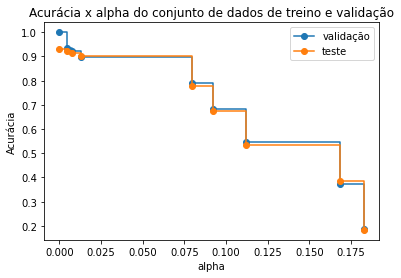

In [29]:
train_scores = [clf.score(X_train,y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [30]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 93.18


DecisionTreeClassifier(random_state=1729)

Acurácia: 86.63


C:\Users\Artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


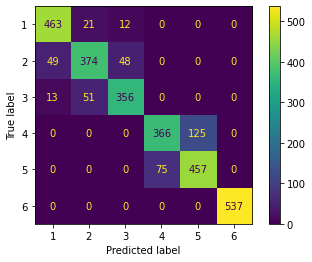

In [32]:
print(f'Acurácia: {melhor_arvore.score(X_test, y_test)*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test, y_test);

- Melhores variáveis pela importance

In [35]:
importance = ({"feature": list(X_train.columns),
               "importance": melhor_arvore.feature_importances_})

importance_clf = pd.DataFrame(importance).sort_values("importance", ascending=False)
importance_clf.head(3)

,feature,importance
52,53 tGravityAcc-min()-X,0.219909
265,266 fBodyAcc-mean()-X,0.202716
41,42 tGravityAcc-mean()-Y,0.135141


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [47]:
%%time
x_train =X_train.iloc[:,importance_clf[0:3].index]
x_valid = X_valid.iloc[:,importance_clf[0:3].index]

Wall time: 1.02 ms


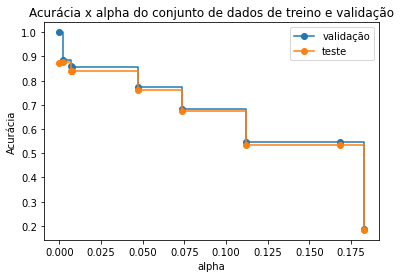

In [49]:
caminho = DecisionTreeClassifier(max_depth=4,random_state=SEED).cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=SEED, ccp_alpha=ccp_alpha).fit(x_train,y_train)
    clfs.append(clf)
    
train_scores = [clf.score(x_train,y_train) for clf in clfs]
valid_scores = [clf.score(x_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [51]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

Acurácia da melhor árvore na base de validação: 87.53


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 75.50


C:\Users\Artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


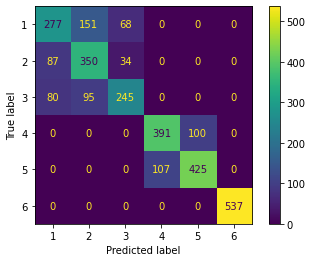

In [52]:
x_test =X_test.iloc[:,importance_clf[0:3].index]

print(f'Acurácia: {melhor_arvore.score(x_test, y_test)*100:.2f}')
plot_confusion_matrix(melhor_arvore, x_test, y_test);

#### Acurácia caiu de  87,53% para 75,50%, como aprendido já é esperado.